In [ ]:
!pip install simfin

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
# Import the main functionality from the SimFin Python API.
import simfin as sf

# Import names used for easy access to SimFin's data-columns.
from simfin.names import *

# Imports for charting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from plotly.offline import iplot
import plotly.graph_objs as go
import numpy as np; np.random.seed(0)

import seaborn as sns; sns.set()

In [ ]:


# Version of the SimFin Python API.
sf.__version__

# SimFin data-directory.
sf.set_data_dir('~/simfin_data/')

sf.set_api_key(api_key='free')



In [ ]:
%%time
# Data for USA.
market = 'us'



# Quarterly Balance Sheets.
df_balance_qrt = sf.load_balance(variant='quarterly', market=market)

# Daily Share-Prices.
df_prices = sf.load_shareprices(variant='daily', market=market)

Dataset "us-balance-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... Done!
CPU times: user 14.8 s, sys: 635 ms, total: 15.4 s
Wall time: 15.4 s


In [ ]:
Rental_tickers = ['HTZ']

df_rental_balance_qrt = df_balance_qrt.loc[Rental_tickers].copy()
df_prices = df_prices.loc[Rental_tickers].copy()



In [ ]:
df_rental_balance_qrt['DtoE'] = df_rental_balance_qrt['Total Liabilities'] / df_balance_qrt['Total Equity']

# Data from Income Statements.
df1 = df_prices[['Adj. Close']]

# Data from Balance Sheets.
df2 = df_rental_balance_qrt[['DtoE','Total Liabilities','Total Equity']]


# Combine the data into a single DataFrame.
df_join = pd.concat([df1, df2], axis=1)

df_join.dropna(inplace=True)

df_join.reset_index(inplace=True)

df_join['DtoE'].mean()


13.665729354525324

In [ ]:
df_join['Alert'] = df_join['DtoE'].apply(lambda x: 'Trade Alert' if x >= 13.66 else 'Stay Put')

df_join = df_join.rename(columns={'level_0':'Ticker','level_1':'Date'})

df_join
df_join.set_index('Date')

df_join.tail()

,Ticker,Date,Adj. Close,DtoE,Total Liabilities,Total Equity,Alert
6,HTZ,2016-06-30,38.23,12.685519,2.041100e+10,1.609000e+09,Stay Put
7,HTZ,2016-09-30,34.89,12.431024,1.955400e+10,1.573000e+09,Stay Put
8,HTZ,2017-03-31,15.24,20.411765,1.873800e+10,9.180000e+08,Trade Alert
9,HTZ,2017-06-30,9.99,28.673280,2.167700e+10,7.560000e+08,Trade Alert
10,HTZ,2018-12-31,11.86,18.091071,2.026200e+10,1.120000e+09,Trade Alert


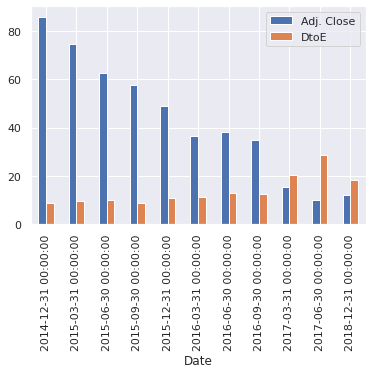

In [ ]:


Debttoequity_Comparison = df_join.plot(x="Date", y=["Adj. Close", 'DtoE',], kind='bar')

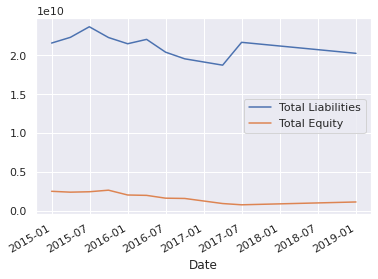

In [ ]:
Debttoequity_Comparison = df_join.plot(x="Date", y=['Total Liabilities','Total Equity'], kind='line')